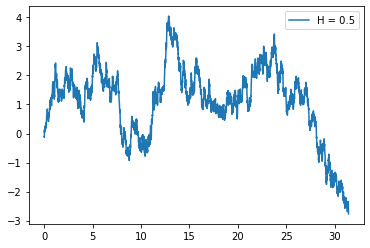

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def fbm(n,t,h):
    '''
    t :: final time 
    n :: number of points in [0,t]
    h :: hurst exponent
    '''
    r=np.array([0.5*(k**(2*h) - 2*(k-1)**(2*h) +(k-2)**(2*h)) for k in range(2,n+2)])
    r=np.append(1,r)
    r=np.append(r,r[len(r)-2:0:-1])
    landa = np.fft.fft(r).real/(len(r))
    mu, sigma = 0, 1
    w = np.fft.fft(np.sqrt(landa)*(np.random.normal(mu, sigma, 2*n)+np.random.normal(mu, sigma, 2*n)*1j))
    w = n**(-h)*np.cumsum(w.real)[0:n+1]
    w = t**h *w
    tt = np.arange(0,n+1)/n * t
    return w,tt

n, t, h = 2**12, 10*np.pi, 0.5
ww, tt = fbm(n, t, h) 
plt.plot(tt,ww, label = "H = "+str(h))
plt.legend()
